# Problema n-queens
La tarea era colocar ocho reinas de ajedrez en el tablero sin que dos de ellas se amenazaran entre sí. En otras palabras, no hay dos reinas que puedan compartir la misma fila, la misma columna o la misma diagonal. El problema de las N-Reinas es similar, usando un tablero de ajedrez N×N y N reinas de ajedrez.

## Módulos requeridos para nuestra evolución.
- `random` nos da una forma de generar bits aleatorios;
- `base` nos da acceso a Toolbox y base Fitness;
- `creator` nos permite crear nuestros tipos;
- `tools` nos da acceso al banco de operadores;
- `array` nos permite hacer operaciones con arreglos.
- `numpy`
- `matplotlib`
- `seaborn`

## Módulos creados
- `elitism`
- `queens`

In [1]:
import random
import array
from deap import base, creator, tools

import elitism
import queens

# problem constants:
NUM_OF_QUEENS = 8

# Genetic Algorithm constants:
POPULATION_SIZE = 300
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual

# set the random seed for repeatable results
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

## Representación del problema
Para encapsular el problema N-Queens, hemos creado una clase de Python llamada queens.py. La clase se inicializa con el tamaño deseado del problema y proporciona los siguientes métodos públicos: 
getViolationsCount(positions): calcula el número de infracciones en la solución dada, que está representado por una lista de índices.
plotBoard(posiciones): Traza las posiciones de las reinas en el tablero de acuerdo con la solución dada

In [2]:
nQueens = queens.NQueensProblem(NUM_OF_QUEENS)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

La segunda línea pasa las propiedades de base.Fitness a FitnessMin donde se minimizará la actitud, tomando como referencia el atributo de pesos (-1.0,). La tercera línea crea una clase Individual que hereda las propiedades del arreglo y adquiere el atributo del tipo FitnessMin que se acaba de crear.


## Toolbox
Dado que la solución está representada por una lista ordenada de enteros, cada uno representando una ubicación de columna de una reina, usamos las siguientes definiciones de caja de herramientas para crear la población inicial:

In [3]:
toolbox = base.Toolbox()
# create an operator that generates randomly shuffled indices:
toolbox.register("randomOrder", random.sample, range(len(nQueens)), len(nQueens))

# create the individual creation operator to fill up an Individual instance with shuffled indices:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

# create the population creation operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

## Evaluación de la Función
La función de aptitud se establece para contar el número de infracciones causadas por la colocación de las damas en el tablero de ajedrez, representadas por cada solución individual:

In [4]:
# fitness calculation - compute the total distance of the list of cities represented by indices:
def getViolationsCount(individual):
    return nQueens.getViolationsCount(individual),  # return a tuple

## Operadores Genéticos
En cuanto a los operadores genéticos, utilizamos la selección de torneos con un tamaño de torneo de 2, así como los operadores de cruce y mutación, que están especializados para listas ordenadas:

In [5]:
toolbox.register("evaluate", getViolationsCount)

# Genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxUniformPartialyMatched, indpb=2.0/len(nQueens))
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(nQueens))

## Evolución de la población
El programa principal es muy simple. Consiste en generar una población, y dársela al algoritmo para que evolucione una solución. Además, continuamos utilizando el enfoque elitista, donde los miembros del salón de la fama (HOF), los mejores individuos actuales, siempre pasan intactos a la próxima generación. Como descubrimos en el capítulo anterior, este enfoque funciona bien con una selección de torneo de tamaño 2:

In [6]:
# Genetic Algorithm flow:
def main():
    import numpy
    
    # create initial population (generation 0):
    pop = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", numpy.min)
    stats.register("avg", numpy.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    pop, logbook = elitism.eaSimpleWithElitism(pop, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    return pop, logbook, hof

Dado que cada problema de N-Queens puede tener múltiples soluciones posibles, imprimimos todos los miembros del salón de la fama, en lugar de solo el primero, para que podamos ver cuántas soluciones válidas encontramos:

gen	nevals	min	avg    
0  	300   	1  	5.08667
1  	251   	0  	3.98333
2  	242   	0  	3.47667
3  	245   	0  	3.53333
4  	249   	0  	3.39667
5  	248   	0  	3.32   
6  	252   	0  	3.54667
7  	246   	0  	3.26   
8  	249   	0  	3.27   
9  	241   	0  	3.41667
10 	239   	0  	3.43667
11 	244   	0  	3.29333
12 	248   	0  	3.12667
13 	246   	0  	3.15333
14 	243   	0  	3.47667
15 	234   	0  	3.47667
16 	247   	0  	3.15667
17 	239   	0  	3.15   
18 	250   	0  	3.09667
19 	246   	0  	2.95333
20 	247   	0  	2.99667
21 	245   	0  	3.03   
22 	249   	0  	3.22   
23 	236   	0  	3.12667
24 	251   	0  	3.09333
25 	228   	0  	3.03333
26 	243   	0  	3.13   
27 	240   	0  	3.12667
28 	240   	0  	3.00333
29 	245   	0  	2.98   
30 	246   	0  	3.28333
31 	237   	0  	3.30333
32 	245   	0  	3.25333
33 	242   	0  	3.12333
34 	246   	0  	3.27   
35 	247   	0  	3.05667
36 	238   	0  	2.94   
37 	256   	0  	2.99333
38 	244   	0  	2.99   
39 	240   	0  	2.98333
40 	236   	0  	3.02667
41 	244   	0  	2.88   
42 	240   	

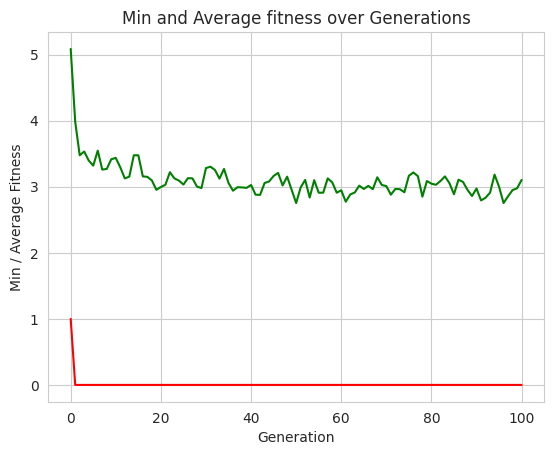

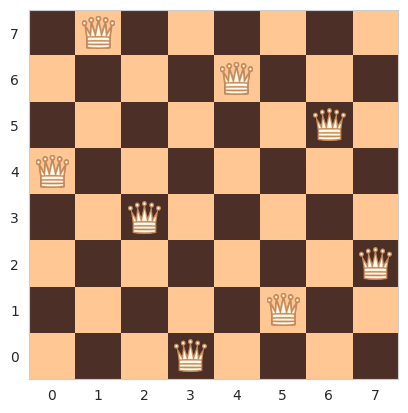

In [7]:
if __name__ == "__main__":
    pop, log, hof = main()
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # print hall of fame members info:
    print("- Las mejores soluciones son:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

    # plot statistics:
    minFitnessValues, meanFitnessValues = log.select("min", "avg")
    plt.figure(1)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    # plot best solution:
    sns.set_style("whitegrid", {'axes.grid' : False})
    nQueens.plotBoard(hof.items[0])

    # show both plots:
    plt.show()